ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#Step1:Load data
years = pd.date_range(start='2014',periods=10,freq='Y')
sales = [600,900,1100,1300,1600,1850,2200,2600,3000,3500]
#create time series
sales_series = pd.Series(data=sales,index=years)
print("Sales Data:\n",sales_series)

Sales Data:
 2014-12-31     600
2015-12-31     900
2016-12-31    1100
2017-12-31    1300
2018-12-31    1600
2019-12-31    1850
2020-12-31    2200
2021-12-31    2600
2022-12-31    3000
2023-12-31    3500
Freq: YE-DEC, dtype: int64


/tmp/ipython-input-2784009753.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(start='2014',periods=10,freq='Y')


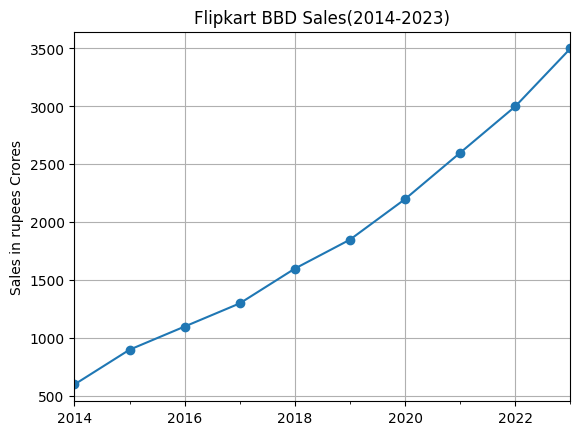

In [4]:
#Step2:Plot time series
sales_series.plot(marker='o',title='Flipkart BBD Sales(2014-2023)',ylabel='Sales in rupees Crores')
plt.grid()
plt.show()

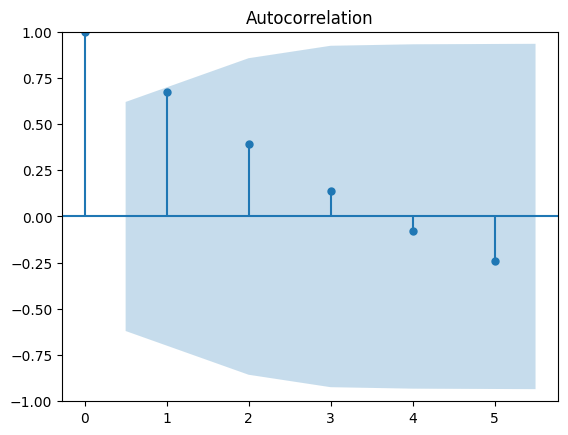

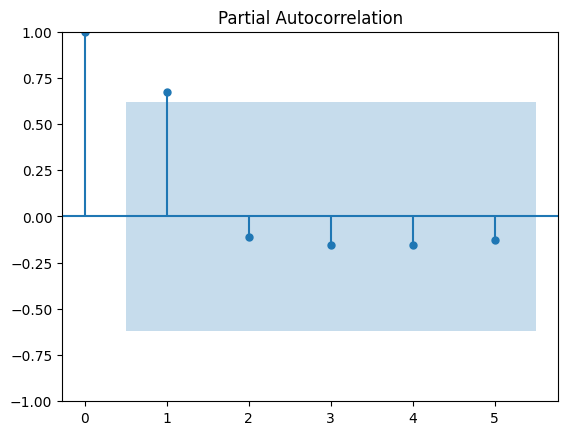

In [5]:
#Step3:ACF and PACF to jusify AR(1)
plot_acf(sales_series)
plot_pacf(sales_series)
plt.show()

In [6]:
#Step4: Fit ARMA(1,0)(ARIMA with d=0,MA=0)
model = ARIMA(sales_series,order=(1,0,0))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -73.709
Date:                Sun, 21 Sep 2025   AIC                            153.419
Time:                        18:06:35   BIC                            154.326
Sample:                    12-31-2014   HQIC                           152.423
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2024.0231   1437.305      1.408      0.159    -793.042    4841.088
ar.L1          0.9681      0.381      2.540      0.011       0.221       1.715
sigma2      1.121e+05   2.79e+05      0.402      0.6

In [7]:
#Step5:Forecast next 2 years
forecast = result.forecast(steps=2)
forecast_years = pd.date_range(start='2024',periods=2,freq='Y')
forecast


/tmp/ipython-input-3071081675.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start='2024',periods=2,freq='Y')


2024-12-31    3452.919275
2025-12-31    3407.340331
Freq: YE-DEC, Name: predicted_mean, dtype: float64

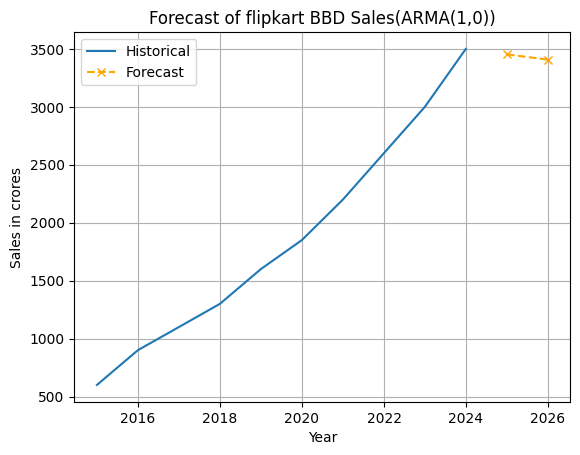

In [8]:
#Step6 : Plot forecast
plt.plot(sales_series,label='Historical')
plt.plot(forecast_years,forecast,marker='x',linestyle='--',label='Forecast',color='orange')
plt.title('Forecast of flipkart BBD Sales(ARMA(1,0))')
plt.xlabel('Year')
plt.ylabel('Sales in crores')
plt.legend()
plt.grid()
plt.show()

Example 2

In [9]:
#Step1:Load data
years = pd.date_range(start='2013',periods=11,freq='Y')
sales = [800,1000,1250,1500,1800,2100,2500,2800,3200,3500,3900]
#create time series
sales_series = pd.Series(data=sales,index=years)
print("Sales Data:\n",sales_series)

Sales Data:
 2013-12-31     800
2014-12-31    1000
2015-12-31    1250
2016-12-31    1500
2017-12-31    1800
2018-12-31    2100
2019-12-31    2500
2020-12-31    2800
2021-12-31    3200
2022-12-31    3500
2023-12-31    3900
Freq: YE-DEC, dtype: int64


/tmp/ipython-input-1817962708.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(start='2013',periods=11,freq='Y')


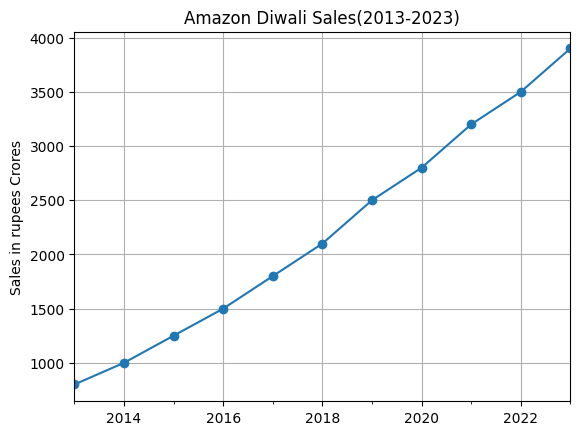

In [10]:
#Step2:Plot original sales data
sales_series.plot(marker='o',title='Amazon Diwali Sales(2013-2023)',ylabel='Sales in rupees Crores')
plt.grid()
plt.show()

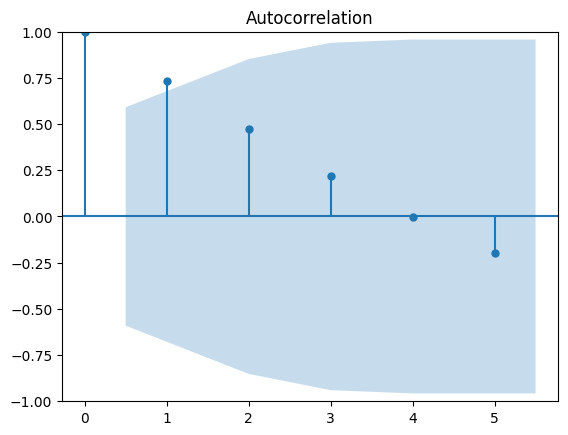

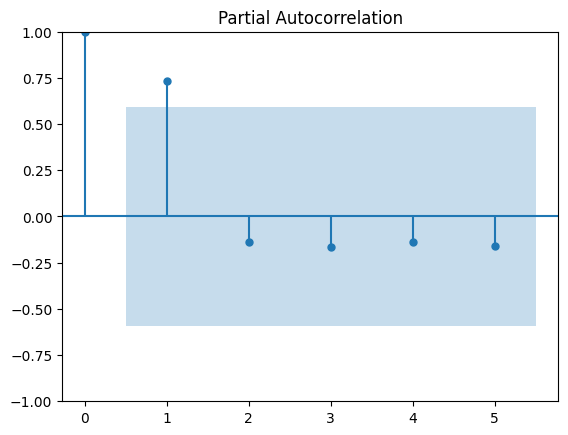

In [11]:
#Step3:ACF and PACF to check for AR(1) suitability
plot_acf(sales_series)
plot_pacf(sales_series)
plt.show()

In [12]:
#Step4: Fit ARMA(1,0)(ARIMA with d=0,MA=0)
model = ARIMA(sales_series,order=(1,0,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -80.457
Date:                Sun, 21 Sep 2025   AIC                            166.914
Time:                        18:06:56   BIC                            168.108
Sample:                    12-31-2013   HQIC                           166.161
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2213.6967   1445.975      1.531      0.126    -620.362    5047.756
ar.L1          0.9760      0.201      4.863      0.000       0.583       1.369
sigma2      1.003e+05   2.06e+05      0.487      0.6

In [13]:
#Step5:Forecast next 2 years
forecast = result.forecast(steps=2)
forecast_years = pd.date_range(start='2024',periods=2,freq='Y')


/tmp/ipython-input-1865015934.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start='2024',periods=2,freq='Y')


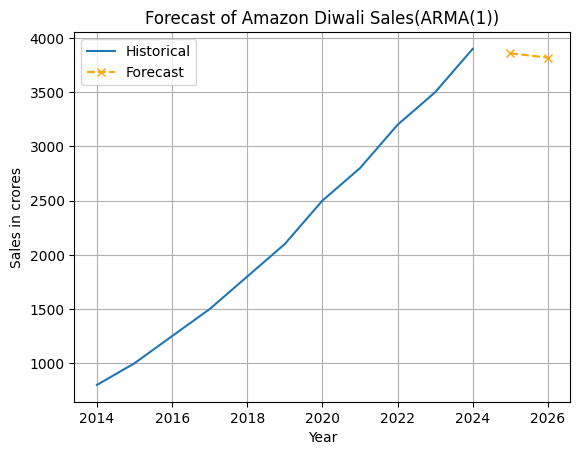

In [14]:
#Step6 : Plot forecast
plt.plot(sales_series,label='Historical')
plt.plot(forecast_years,forecast,marker='x',linestyle='--',label='Forecast',color='orange')
plt.title('Forecast of Amazon Diwali Sales(ARMA(1))')
plt.xlabel('Year')
plt.ylabel('Sales in crores')
plt.legend()
plt.grid()
plt.show()

In [15]:
#print forecasted values
print("Forecasted Amazon diwali sales:")
for year,value in zip(forecast_years.year,forecast):
  print(f"{year}:{value:.2f} crores")

Forecasted Amazon diwali sales:
2024:3859.53 crores
2025:3820.04 crores
